In [ ]:
# crash colab to get more RAM
# !kill -9 -1

In [1]:
!nvidia-smi

Fri Apr 21 04:03:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install -U datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 12.5 MB/s eta 0:00:00


In [3]:
%%capture
!pip install transformers==4.19.2
!pip install rouge_score

In [4]:
from datasets import load_metric

In [ ]:
# /content/drive/MyDrive/ML/data/articlesSet1.csv

In [5]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ML/data/articlesSet1.csv")

In [6]:
df.shape

(26938, 2)

In [ ]:
import torch
print(torch.__version__)

2.0.0+cu118


In [ ]:
!conda install pytorch torchvision torchaudio cudatoolkit=11.0 -c pytorch

In [ ]:
# 1.11.0+cu113

In [7]:
df['length'] = df.content.map(lambda x: len(x.split(" ")))

In [8]:
df.head()

,content,summary,length
0,Photo by Josh Riemer on Unsplash<|n|><|n|>Merr...,"Irrespective of gender, race, age or religion ...",846
1,Your Brain On Coronavirus<|n|><|n|>A guide to ...,These pathways converge and mediate brain heal...,1067
2,Mind Your Nose<|n|><|n|>How smell training can...,Learning a new language or reading more books ...,896
3,Passionate about the synergy between science a...,Passionate about the synergy between science a...,18
4,"You’ve heard of him, haven’t you? Phineas Gage...","What about him?” Well, let’s just say that he ...",372


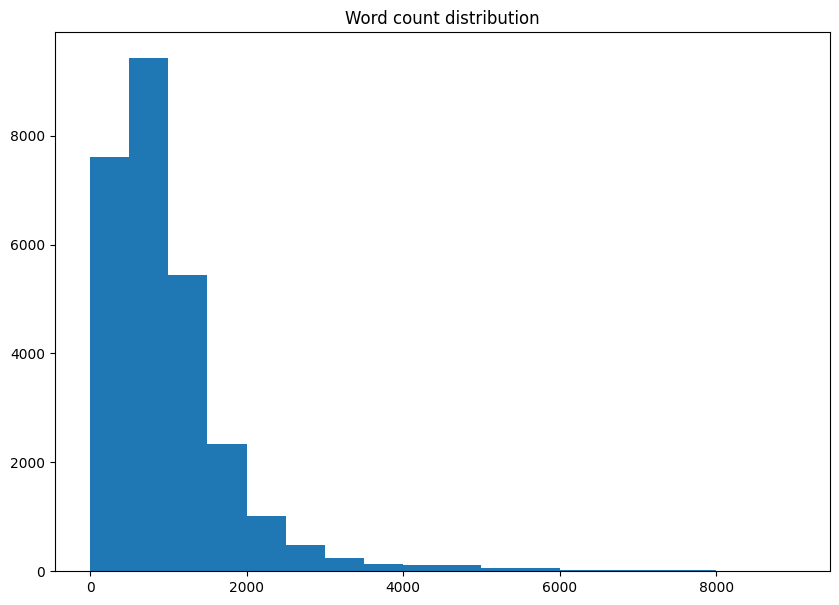

In [9]:
numOfWords = df.length
from matplotlib import pyplot as plt
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.hist(numOfWords.to_numpy(), bins = [0, 500, 1000, 1500,
                    2000, 2500, 3000, 3500, 4000, 5000, 6000, 7000, 8000, 9000])
 
plt.title("Word count distribution")
 
# show plot
plt.show()

In [10]:
tempDf = df[df.length <= 800]

In [11]:
tempDf = tempDf[tempDf.length >= 100]

In [12]:
tempDf.shape

(13155, 3)

In [13]:
tempDf['length2'] = tempDf.summary.map(lambda x: len(x.split(" ")))

In [14]:
tempDf = tempDf[tempDf.length2 <= 900]
tempDf.shape

(13155, 4)

In [15]:
import datasets
import random
import pandas as pd
from IPython.display import display, HTML

def show_random_elements(dataset, num_examples=4):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)
    
    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, datasets.ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))

In [16]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("allenai/led-base-16384")

Downloading:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [17]:
max_input_length = 1024
max_output_length = 1024
batch_size = 4

In [18]:
def process_data_to_model_inputs(batch):
    # tokenize the inputs and labels
    inputs = tokenizer(
        batch["summary"],
        padding="max_length",
        truncation=True,
        max_length=max_input_length,
    )
    outputs = tokenizer(
        batch["content"],
        padding="max_length",
        truncation=True,
        max_length=max_output_length,
    )

    batch["input_ids"] = inputs.input_ids
    batch["attention_mask"] = inputs.attention_mask

    # create 0 global_attention_mask lists
    batch["global_attention_mask"] = len(batch["input_ids"]) * [
        [0 for _ in range(len(batch["input_ids"][0]))]
    ]

    # since above lists are references, the following line changes the 0 index for all samples
    batch["global_attention_mask"][0][0] = 1
    batch["labels"] = outputs.input_ids

    # We have to make sure that the PAD token is ignored
    batch["labels"] = [
        [-100 if token == tokenizer.pad_token_id else token for token in labels]
        for labels in batch["labels"]
    ]

    return batch

In [19]:
import numpy as np
train, validate, test = np.split(tempDf.sample(frac=1, random_state=42), [int(.4*len(df)), int(.5*len(df))])

In [20]:
train.shape

(10775, 4)

In [21]:
validate.shape

(2380, 4)

In [22]:
train = train[250:500]
validate = validate[25:50]

In [23]:
print(train.shape, validate.shape)

(250, 4) (25, 4)


In [24]:
from datasets import Dataset
train_dataset = Dataset.from_pandas(train)
val_dataset = Dataset.from_pandas(validate)

In [25]:
train_dataset

Dataset({
    features: ['content', 'summary', 'length', 'length2', '__index_level_0__'],
    num_rows: 250
})

In [26]:
train_dataset = train_dataset.map(
    process_data_to_model_inputs,
    batched=True,
    batch_size=batch_size,
    remove_columns=["content", "summary", "length", "length2", "__index_level_0__"],
)

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

In [27]:
val_dataset

Dataset({
    features: ['content', 'summary', 'length', 'length2', '__index_level_0__'],
    num_rows: 25
})

In [28]:
val_dataset = val_dataset.map(
    process_data_to_model_inputs,
    batched=True,
    batch_size=batch_size,
    remove_columns=["content", "summary", "length", "length2", "__index_level_0__"],
)

Map:   0%|          | 0/25 [00:00<?, ? examples/s]

In [29]:
train_dataset.set_format(
    type="torch",
    columns=["input_ids", "attention_mask", "global_attention_mask", "labels"],
)
val_dataset.set_format(
    type="torch",
    columns=["input_ids", "attention_mask", "global_attention_mask", "labels"],
)

In [30]:
train_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'global_attention_mask', 'labels'],
    num_rows: 250
})

In [31]:
len(train_dataset['global_attention_mask'][0])

1024

In [32]:
len(train_dataset['labels'][0])

1024

In [33]:
val_dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'global_attention_mask', 'labels'],
    num_rows: 25
})

In [34]:
len(val_dataset['input_ids'][0])

1024

In [ ]:
chunk_size = 1024
def group_texts(batched_data):
    concatenated_examples = {k: sum(batched_data[k], []) for k in batched_data.keys()}
    total_length = len(concatenated_examples[list(batched_data.keys())[0]])
    total_length = (total_length // chunk_size) * chunk_size
    result = {k : [t[i: i+chunk_size] for i in range(0, total_length, chunk_size)] for k, t in concatenated_examples.items()}
    return result

## Training

In [35]:
from transformers import AutoModelForSeq2SeqLM
led = AutoModelForSeq2SeqLM.from_pretrained("allenai/led-base-16384", gradient_checkpointing=True, use_cache=False)

Downloading:   0%|          | 0.00/618M [00:00<?, ?B/s]

In [36]:
# set generate hyperparameters
led.config.num_beams = 2
led.config.max_length = 1024
led.config.min_length = 512
led.config.length_penalty = 2.0
led.config.early_stopping = True
led.config.no_repeat_ngram_size = 3

In [37]:
rouge = load_metric("rouge")

<ipython-input-37-6f1857dc142f>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge = load_metric("rouge")


In [38]:
def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = tokenizer.pad_token_id
    label_str = tokenizer.batch_decode(labels_ids, skip_special_tokens=True)

    rouge_output = rouge.compute(
        predictions=pred_str, references=label_str, rouge_types=["rouge2"]
    )["rouge2"].mid

    return {
        "rouge2_precision": round(rouge_output.precision, 4),
        "rouge2_recall": round(rouge_output.recall, 4),
        "rouge2_fmeasure": round(rouge_output.fmeasure, 4),
    }

In [39]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

In [40]:
# enable fp16 apex training
training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    evaluation_strategy="steps",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    output_dir="./",
    logging_steps=5,
    eval_steps=10,
    save_steps=10,
    save_total_limit=2,
    gradient_accumulation_steps=4,
    num_train_epochs=1
)

In [41]:
trainer = Seq2SeqTrainer(
    model=led,
    tokenizer=tokenizer,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

In [42]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 250
  Num Epochs = 1
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 4
  Total optimization steps = 15


Step,Training Loss,Validation Loss


***** Running Evaluation *****
  Num examples = 25
  Batch size = 4


Step,Training Loss,Validation Loss,Rouge2 Precision,Rouge2 Recall,Rouge2 Fmeasure
10,2.767100,2.629537,0.137500,0.223900,0.163900


Saving model checkpoint to ./checkpoint-10
Configuration saved in ./checkpoint-10/config.json
Model weights saved in ./checkpoint-10/pytorch_model.bin
tokenizer config file saved in ./checkpoint-10/tokenizer_config.json
Special tokens file saved in ./checkpoint-10/special_tokens_map.json


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=15, training_loss=3.296922492980957, metrics={'train_runtime': 2415.085, 'train_samples_per_second': 0.104, 'train_steps_per_second': 0.006, 'total_flos': 162012290088960.0, 'train_loss': 3.296922492980957, 'epoch': 0.95})

###Testing

In [ ]:
sample = tempDf.sample(frac=0.00025, random_state=52)
sample.shape

(3, 4)

In [ ]:
sample = sample[['content', 'summary']]

In [ ]:
sample['content']

26806    There are certain kinds of people we hate to h...
24092    Uber’s business plan, like that of so many oth...
14173    Build the Node Application<|n|><|n|>Basic setu...
Name: content, dtype: object

In [ ]:
from datasets import Dataset
pubmed_test = Dataset.from_pandas(sample)

In [ ]:
pubmed_test

Dataset({
    features: ['content', 'summary', '__index_level_0__'],
    num_rows: 3
})

In [ ]:
import torch

from datasets import load_dataset, load_metric
from transformers import LEDTokenizer, LEDForConditionalGeneration

# load tokenizer
tokenizer = LEDTokenizer.from_pretrained("/content/chkpnt/checkpointLED250")
model = LEDForConditionalGeneration.from_pretrained("/content/chkpnt/checkpointLED250").to("cuda").half()


def generate_answer(batch):
  inputs_dict = tokenizer(batch["summary"], padding="max_length", max_length=1024, return_tensors="pt", truncation=True)
  input_ids = inputs_dict.input_ids.to("cuda")
  attention_mask = inputs_dict.attention_mask.to("cuda")
  global_attention_mask = torch.zeros_like(attention_mask)
#   # put global attention on <s> token
#   global_attention_mask[:, 0] = 1

  predicted_abstract_ids = model.generate(input_ids, attention_mask=attention_mask, global_attention_mask=global_attention_mask)
  batch["predicted_content"] = tokenizer.batch_decode(predicted_abstract_ids, skip_special_tokens=True)
  return batch


result = pubmed_test.map(generate_answer, batched=True, batch_size=2)

# load rouge
rouge = load_metric("rouge")

print("Result:", rouge.compute(predictions=result["predicted_content"], references=result["content"], rouge_types=["rouge2"])["rouge2"].mid)


Didn't find file /content/chkpnt/checkpointLED250/added_tokens.json. We won't load it.
loading file /content/chkpnt/checkpointLED250/vocab.json
loading file /content/chkpnt/checkpointLED250/merges.txt
loading file None
loading file /content/chkpnt/checkpointLED250/special_tokens_map.json
loading file /content/chkpnt/checkpointLED250/tokenizer_config.json
loading configuration file /content/chkpnt/checkpointLED250/config.json
Model config LEDConfig {
  "_name_or_path": "allenai/led-base-16384",
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "architectures": [
    "LEDForConditionalGeneration"
  ],
  "attention_dropout": 0.0,
  "attention_window": [
    1024,
    1024,
    1024,
    1024,
    1024,
    1024
  ],
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 768,
  "decoder_attention_heads": 12,
  "decoder_ffn_dim": 3072,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 6,
  "decoder_start_token_id": 2,
  "dropout": 0.1,
  "early_

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Result: Score(precision=0.14384291339038244, recall=0.1450087659671074, fmeasure=0.13760288204074667)


In [ ]:
result

Dataset({
    features: ['content', 'summary', '__index_level_0__', 'predicted_content'],
    num_rows: 3
})

In [ ]:
result['content'][0]

'There are certain kinds of people we hate to have around us. Most notably, the kind prone to abusive and violent outbursts. However, not everyone bad for us gives out such loud and obvious signals.<|n|><|n|>In fact, certain traits make people likable to us when it’s in our best interests to stay away from them. Besides, sometimes even well-meaning friends can cause us much harm through unintended consequences of their actions.<|n|><|n|>The thing is, when we are with our friends, we feel comfortable enough to shed our inhibitions and let our guards down. And why not? Life would be miserable if we couldn’t be our true selves even in the company of our friends.<|n|><|n|>But that also makes us vulnerable.<|n|><|n|>So you must recognize early the kind of people who are deceptively dangerous and guard yourself against them. These are the people who can make your life miserable without your having the slightest idea of what’s going on.<|n|><|n|>So, here are the five red flags you must watch 

In [ ]:
result['predicted_content'][0]

'And why not? Why not? Because it’s the only way. And why not, right? Because I’m not the only one who’d do it. And I don’t want to be the only person who does it. But I do want to do it, and I want to try. And so I did. And then I did it. I did the same thing. I tried. And it worked. And again and again. And once again, it worked! And again.And again. But again, I did this. I wanted to do this. And yet again, and again, again. Because I wanted it to work. And this time, I wanted the same result. And the same reason. Because it was the first time I had ever done it. It was the very first time. And now I want it back. And even more importantly, I want the same results. I want this to work for me. And for you, too. Because this is what I want. And because I want my kids to be happy. And not just happy. Because they’re happy.Because I want them happy.And so I do. And here’ll be the next step: I want their happiness. And if they want it, they can do it! And I want that happiness. So I”m go